<a href="https://colab.research.google.com/github/nati-rc/SEM_Rev_Conv_Prediction/blob/main/SEM_Rev_Conv_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uploading the Data Set from Kaggle

**Steps to Download kaggle.json (API Key)**

1.   Go to Kaggle: https://www.kaggle.com/
2.   Click on Your Profile (Top Right Corner) → Go to Account Settings.
3.   Scroll down to "API" section → Click "Create New API Token".
4.   This will automatically download a file named kaggle.json to your computer.

***Make sure kaggle.json is uploaded to your Colab***

In [44]:
# Installing kaggle
!pip install -q kaggle

In [45]:
# Moving the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [46]:
# Uploading the data set
!kaggle datasets download -d marceaxl82/shopping-mall-paid-search-campaign-dataset/

Dataset URL: https://www.kaggle.com/datasets/marceaxl82/shopping-mall-paid-search-campaign-dataset/versions/
License(s): CC0-1.0
shopping-mall-paid-search-campaign-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
# Checking for the filename
!ls

final_shop_6modata.csv
joint_revenue_conversions_linear_regression_model.pkl
kaggle.json
minmax_scaler.pkl
normalized_test_model_final.csv
normalized_train_model_final.csv
sample_data
shopping-mall-paid-search-campaign-dataset.zip
simulation_data.csv
simulation_predictions.csv


In [48]:
!unzip shopping-mall-paid-search-campaign-dataset.zip

# Taking a quick look at the unziped file
import pandas as pd

df = pd.read_csv('final_shop_6modata.csv')
df.head(50)

Archive:  shopping-mall-paid-search-campaign-dataset.zip
replace final_shop_6modata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: final_shop_6modata.csv  


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604
5,Shop - 1:1 - Mob - [shop coupon code],July,46507,21756,0.47,1665,0.05,13157,0.60,8550,185824.49,-4606.713
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,0.04,19371,0.33,13699,294536.92,-5672.271
7,Shop - 1:1 - Mob - [shop discount code],July,9950,4283,0.43,347,0.05,2637,0.62,2038,46026.32,-598.993
8,Shop - 1:1 - Mob - [shop promo code],July,57373,27121,0.47,2940,0.07,16946,0.62,14565,321387.88,-2380.616
9,Shop - 1:1 - Mob - [shop promo],July,1875,706,0.38,69,0.07,485,0.69,409,8946.99,-75.734


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [50]:
# Checking for null values
df.isnull().sum()

,0
Ad Group,0
Month,0
Impressions,0
Clicks,0
CTR,0
Conversions,0
Conv Rate,0
Cost,0
CPC,0
Revenue,0


### Dataset Info

* Ad Group: category of the advert (coupon/promo code, desktop ad/mobile ad etc…)

* Month: month of the campaign. The campaign started in July 2021 and ended in November 2021.

* Impressions: number of digital views

* Clicks: how many clicks the ad received

* CTR: Click Through Rate, the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR.

* Conversions: Conversions are those valuable actions that users take on your site like buying something or filling in a form. The success can be measured in the number of conversions generated at a particular cost.

* Conv Rate: Conversion Rate. It is the percentage of people who convert after clicking on your ads.

* Cost: Cost is the actual money spent by the advertiser (the "shop") for the related ad group.

* CPC: Cost Per Click, it is the cost of the specific ads divided by the click.

* Revenue: Revenue is the total amount of income generated by advertisment.

* Sale Amount: Sale Amount for this dataset means the quantity of sales derived by the single ad group.

* P&L: Profit and Loss, based on the formula Revenue - Cost. For this dataset mesaures the profit of the specific Ad Group.

# 🗒 Pre-Modeling Data Preparation
This section includes EDA, normalization, encoding, feature engineering, and data preprocessing steps.

## Data Clean-Up

### Recalculating Conversion Rates
Re-computing the Convertion Rate as the numbers on orignal data set don't match conv. rate formula (conv/clicks)


In [51]:
df['Calculated Conv Rate (%)'] = (df['Conversions'] / df['Clicks']) * 100

df[['Conversions', 'Clicks', 'Conv Rate', 'Calculated Conv Rate (%)']].head(10)

,Conversions,Clicks,Conv Rate,Calculated Conv Rate (%)
0,1166,6504,0.10,17.927429
1,2188,14367,0.09,15.229345
2,248,1458,0.09,17.009602
3,2294,10418,0.12,22.019581
4,61,282,0.15,21.631206
5,1665,21756,0.05,7.653061
6,2666,59177,0.04,4.505129
7,347,4283,0.05,8.101798
8,2940,27121,0.07,10.840308
9,69,706,0.07,9.773371


In [52]:
# Dropping the original 'Conv Rate' column
df.drop(columns=['Conv Rate'], inplace=True)

df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,Calculated Conv Rate (%)
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,6669,1.03,6402,136770.05,-267.086,17.927429
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,13746,0.96,13262,283215.21,-483.951,15.229345
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,1606,1.10,1723,39165.46,117.136,17.009602
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,13278,1.27,13042,284823.48,-235.921,22.019581
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,391,1.39,337,7717.77,-53.604,21.631206


### Splitting "Ad Group" values into several columns
There is valuable information in the "Ad Group" values that could be used for model training as well as data analysis, thus is better to split this info into their own columns.

In [53]:
# Splitting Ad Group into several columns

ad_group_split = df['Ad Group'].str.split(' - ', expand=True)

df['Shop Type'] = ad_group_split[0]
df['Format'] = ad_group_split[1]
df['Device Type'] = ad_group_split[2]
df['Category'] = ad_group_split[3]

# Checking for rows that do not conform to the pattern
invalid_rows = df[ad_group_split.isnull().any(axis=1)]

# Display invalid rows, if any
invalid_rows


,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,Calculated Conv Rate (%),Shop Type,Format,Device Type,Category


In [54]:
# Cleaning the 'Category' column: removing square brackets and strip extra spaces
df['Category'] = df['Category'].str.replace(r'\[|\]', '', regex=True).str.strip()

df.head(10)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,Calculated Conv Rate (%),Shop Type,Format,Device Type,Category
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,6669,1.03,6402,136770.05,-267.086,17.927429,Shop,1:1,Desk,shop coupon code
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,13746,0.96,13262,283215.21,-483.951,15.229345,Shop,1:1,Desk,shop coupon
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,1606,1.10,1723,39165.46,117.136,17.009602,Shop,1:1,Desk,shop discount code
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,13278,1.27,13042,284823.48,-235.921,22.019581,Shop,1:1,Desk,shop promo code
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,391,1.39,337,7717.77,-53.604,21.631206,Shop,1:1,Desk,shop promo
5,Shop - 1:1 - Mob - [shop coupon code],July,46507,21756,0.47,1665,13157,0.60,8550,185824.49,-4606.713,7.653061,Shop,1:1,Mob,shop coupon code
6,Shop - 1:1 - Mob - [shop coupon],July,152394,59177,0.39,2666,19371,0.33,13699,294536.92,-5672.271,4.505129,Shop,1:1,Mob,shop coupon
7,Shop - 1:1 - Mob - [shop discount code],July,9950,4283,0.43,347,2637,0.62,2038,46026.32,-598.993,8.101798,Shop,1:1,Mob,shop discount code
8,Shop - 1:1 - Mob - [shop promo code],July,57373,27121,0.47,2940,16946,0.62,14565,321387.88,-2380.616,10.840308,Shop,1:1,Mob,shop promo code
9,Shop - 1:1 - Mob - [shop promo],July,1875,706,0.38,69,485,0.69,409,8946.99,-75.734,9.773371,Shop,1:1,Mob,shop promo


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad Group                  190 non-null    object 
 1   Month                     190 non-null    object 
 2   Impressions               190 non-null    int64  
 3   Clicks                    190 non-null    int64  
 4   CTR                       190 non-null    float64
 5   Conversions               190 non-null    int64  
 6   Cost                      190 non-null    int64  
 7   CPC                       190 non-null    float64
 8   Revenue                   190 non-null    int64  
 9   Sale Amount               190 non-null    float64
 10  P&L                       190 non-null    float64
 11  Calculated Conv Rate (%)  190 non-null    float64
 12  Shop Type                 190 non-null    object 
 13  Format                    190 non-null    object 
 14  Device Typ

### Creating quick summary of the values in the data
Lets take a quick look at the distribution of the values for each feature.

In [17]:
# Select only numeric columns for summary statistics
numeric_cols = df[['Impressions', 'Clicks', 'CTR', 'Conversions', 'Cost', 'CPC',
                   'Revenue', 'Sale Amount', 'P&L', 'Calculated Conv Rate (%)']]

# Descriptive statistics
summary_stats = numeric_cols.describe()

# Calculate median and standard deviation for numeric columns
median_values = numeric_cols.median()
std_values = numeric_cols.std()

# Identify ranges for specific metrics
metric_ranges = {
    'CTR': (df['CTR'].min(), df['CTR'].max()),
    'CPC': (df['CPC'].min(), df['CPC'].max()),
    'Conv Rate': (df['Calculated Conv Rate (%)'].min(), df['Calculated Conv Rate (%)'].max()),
    'P&L': (df['P&L'].min(), df['P&L'].max()),
}

# Display results
print("Summary Statistics:\n", summary_stats)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation Values:\n", std_values)
print("\nMetric Ranges:\n", metric_ranges)


Summary Statistics:
          Impressions        Clicks         CTR  Conversions          Cost  \
count     190.000000    190.000000  190.000000   190.000000    190.000000   
mean    14077.363158   4865.805263    0.272105   505.242105   3344.063158   
std     29771.686227  11348.529219    0.107894  1052.202922   6524.606753   
min        35.000000      2.000000    0.050000     0.000000      1.000000   
25%      1065.000000    264.500000    0.192500    24.000000    188.500000   
50%      4969.000000    930.000000    0.285000    70.500000    563.500000   
75%     13380.000000   4190.500000    0.360000   428.250000   2967.000000   
max    276568.000000  99526.000000    0.470000  7563.000000  43542.000000   

              CPC       Revenue    Sale Amount          P&L  \
count  190.000000    190.000000     190.000000   190.000000   
mean     0.791263   2957.684211   63416.180579  -386.361916   
std      0.403312   5962.413097  125414.656922   903.073776   
min      0.140000      0.000000  

## Splitting the Data Set

### Splitting the data set: Simualation Set
**Note:** This is an optional extra step that I'm taking to mimic real life scenario to demonstrate how the model will be used in real life case.

In [56]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% for training and 20% for real-life simulation
df_train, df_simulate = train_test_split(df, test_size=0.2, random_state=42)

# Reset the indices for the splits
df_train.reset_index(drop=True, inplace=True)
df_simulate.reset_index(drop=True, inplace=True)

# Verify the split
print("Training Dataset Shape:", df_train.shape)
print("Simulation Dataset Shape:", df_simulate.shape)


Training Dataset Shape: (152, 16)
Simulation Dataset Shape: (38, 16)


In [57]:
# Mimic missing data by removing specified columns
columns_to_remove = ['Conversions', 'Calculated Conv Rate (%)', 'P&L', 'Sale Amount', 'Revenue']
df_simulate.drop(columns=columns_to_remove, inplace=True)

# Verify the changes
df_simulate.head()


,Ad Group,Month,Impressions,Clicks,CTR,Cost,CPC,Shop Type,Format,Device Type,Category
0,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,24149,0.57,Shop,1:1,Mob,shop coupon code
1,Shop - Phrase - Mob - Competitor,November,127,32,0.25,18,0.59,Shop,Phrase,Mob,Competitor
2,Shop - Phrase - Mob - Competitor,September,54,9,0.17,4,0.45,Shop,Phrase,Mob,Competitor
3,Shop - Phrase - Desk - Discount Code,August,1088,159,0.15,163,1.03,Shop,Phrase,Desk,Discount Code
4,Shop - Exact - Mob - Offer,September,1288,340,0.26,239,0.70,Shop,Exact,Mob,Offer


In [20]:
# Save the Simulation dataset to a CSV file
df_simulate.to_csv('simulation_data.csv', index=False)
print("Simulation dataset saved as 'simulation_data.csv'.")

Simulation dataset saved as 'simulation_data.csv'.


### Splitting the remaining data into test and train sets to prep for model training

In [58]:
from sklearn.model_selection import train_test_split

# Split df_train into df_train_model (80%) and df_test_model (20%)
df_train_model, df_test_model = train_test_split(df_train, test_size=0.2, random_state=42)

# Verify the split
print("Training Dataset Shape:", df_train_model.shape)
print("Testing Dataset Shape:", df_test_model.shape)


Training Dataset Shape: (121, 16)
Testing Dataset Shape: (31, 16)


In [59]:
import numpy as np

# Map months to numeric values
month_mapping = {'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11}
df_train_model['Month Numeric'] = df_train_model['Month'].map(month_mapping)

# Cyclical encoding for the Month column
df_train_model['Month Sin'] = np.sin(2 * np.pi * df_train_model['Month Numeric'] / 12)
df_train_model['Month Cos'] = np.cos(2 * np.pi * df_train_model['Month Numeric'] / 12)

# Drop the original Month column
df_train_model.drop(columns=['Month'], inplace=True)

# Display the updated DataFrame
df_train_model.head()



,Ad Group,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,Calculated Conv Rate (%),Shop Type,Format,Device Type,Category,Month Numeric,Month Sin,Month Cos
29,Shop - Exact - Mob - Sale,8454,726,0.09,26,277,0.38,115,2300.72,-161.951,3.581267,Shop,Exact,Mob,Sale,10,-0.866025,0.500000
22,Shop - Phrase - Mob - Offer,31793,7159,0.23,532,5075,0.71,3260,66443.24,-1814.562,7.431205,Shop,Phrase,Mob,Offer,11,-0.500000,0.866025
51,Shop - Phrase - Mob - Promo Code,9619,2908,0.30,199,1476,0.51,1211,25311.15,-265.424,6.843191,Shop,Phrase,Mob,Promo Code,10,-0.866025,0.500000
75,Shop - Exact - Mob - Offer,6838,1235,0.18,85,641,0.52,676,14020.86,34.512,6.882591,Shop,Exact,Mob,Offer,11,-0.500000,0.866025
11,Shop - Phrase - Mob - Competitor,55,11,0.20,2,5,0.51,16,313.50,10.675,18.181818,Shop,Phrase,Mob,Competitor,7,-0.500000,-0.866025


## Feature Engineering
Adding adiditonal Features based on existing data with the goal of giving more context to the model to achieve more accurate results.

In [60]:
# Create Click Efficiency feature
df_train_model['Clicks per Impression'] = df_train_model['Clicks'] / df_train_model['Impressions']

# Interaction terms
df_train_model['Cost x Impressions'] = df_train_model['Cost'] * df_train_model['Impressions']
df_train_model['Cost x Clicks'] = df_train_model['Cost'] * df_train_model['Clicks']

# Log transformations
df_train_model['Log Cost'] = np.log1p(df_train_model['Cost'])
df_train_model['Log Impressions'] = np.log1p(df_train_model['Impressions'])

# Device-specific interaction features
if 'Device Type_Mob' in df_train_model.columns:
    df_train_model['Cost x Mobile'] = df_train_model['Cost'] * df_train_model['Device Type_Mob']
    df_train_model['Impressions x Mobile'] = df_train_model['Impressions'] * df_train_model['Device Type_Mob']

# Handle potential division by zero
df_train_model.replace([float('inf'), float('-inf')], 0, inplace=True)

# Display the updated DataFrame
df_train_model.head()


,Ad Group,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,...,Device Type,Category,Month Numeric,Month Sin,Month Cos,Clicks per Impression,Cost x Impressions,Cost x Clicks,Log Cost,Log Impressions
29,Shop - Exact - Mob - Sale,8454,726,0.09,26,277,0.38,115,2300.72,-161.951,...,Mob,Sale,10,-0.866025,0.500000,0.085877,2341758,201102,5.627621,9.042513
22,Shop - Phrase - Mob - Offer,31793,7159,0.23,532,5075,0.71,3260,66443.24,-1814.562,...,Mob,Offer,11,-0.500000,0.866025,0.225175,161349475,36331925,8.532279,10.367033
51,Shop - Phrase - Mob - Promo Code,9619,2908,0.30,199,1476,0.51,1211,25311.15,-265.424,...,Mob,Promo Code,10,-0.866025,0.500000,0.302318,14197644,4292208,7.297768,9.171600
75,Shop - Exact - Mob - Offer,6838,1235,0.18,85,641,0.52,676,14020.86,34.512,...,Mob,Offer,11,-0.500000,0.866025,0.180608,4383158,791635,6.464588,8.830397
11,Shop - Phrase - Mob - Competitor,55,11,0.20,2,5,0.51,16,313.50,10.675,...,Mob,Competitor,7,-0.500000,-0.866025,0.200000,275,55,1.791759,4.025352


In [61]:
df_train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 29 to 102
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad Group                  121 non-null    object 
 1   Impressions               121 non-null    int64  
 2   Clicks                    121 non-null    int64  
 3   CTR                       121 non-null    float64
 4   Conversions               121 non-null    int64  
 5   Cost                      121 non-null    int64  
 6   CPC                       121 non-null    float64
 7   Revenue                   121 non-null    int64  
 8   Sale Amount               121 non-null    float64
 9   P&L                       121 non-null    float64
 10  Calculated Conv Rate (%)  121 non-null    float64
 11  Shop Type                 121 non-null    object 
 12  Format                    121 non-null    object 
 13  Device Type               121 non-null    object 
 14  Category      

### Checking for Correlation between the Features
High correlation between independent variables can lead to instability, redundancy, and inefficiency. Identifying and removing these correlations improves model accuracy, efficiency, and interpretability.
This is crucial when dealing with large data sets.



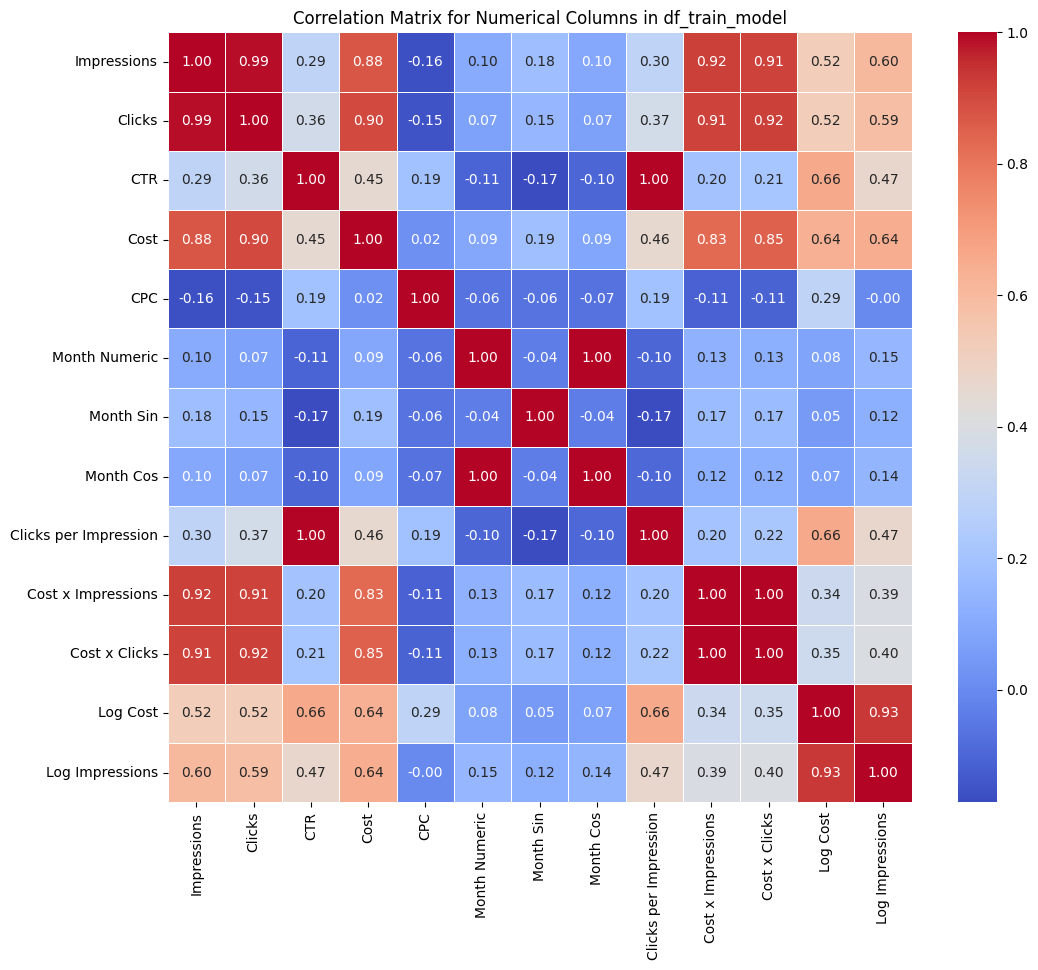

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_columns = [
    'Impressions', 'Clicks', 'CTR', 'Cost', 'CPC', 'Month Numeric',
    'Month Sin', 'Month Cos', 'Clicks per Impression',
    'Cost x Impressions', 'Cost x Clicks', 'Log Cost', 'Log Impressions'
]

# Compute correlation matrix for numerical columns
correlation_matrix = df_train_model[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns in df_train_model')
plt.show()


In [62]:
# Drop "Clicks per Impression"
df_train_model.drop(columns=['Clicks per Impression'], inplace=True)

# Drop "Month Numeric" (keeping "Month Cos" as cyclical encoding is often more informative)
df_train_model.drop(columns=['Month Numeric'], inplace=True)

# Drop "Cost x Impressions"
df_train_model.drop(columns=['Cost x Impressions'], inplace=True)

# Verify the updated DataFrame
df_train_model.info()


<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 29 to 102
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad Group                  121 non-null    object 
 1   Impressions               121 non-null    int64  
 2   Clicks                    121 non-null    int64  
 3   CTR                       121 non-null    float64
 4   Conversions               121 non-null    int64  
 5   Cost                      121 non-null    int64  
 6   CPC                       121 non-null    float64
 7   Revenue                   121 non-null    int64  
 8   Sale Amount               121 non-null    float64
 9   P&L                       121 non-null    float64
 10  Calculated Conv Rate (%)  121 non-null    float64
 11  Shop Type                 121 non-null    object 
 12  Format                    121 non-null    object 
 13  Device Type               121 non-null    object 
 14  Category      

### Using Random Forest to get an idea of the most important Features
Random Forest is a great model to use for determining Feature importance. This is a good tactic to use when dealing with a great amount of features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Drop non-numerical columns and dependent variables from features
features = [
    'Impressions', 'Clicks', 'CTR', 'Cost', 'CPC', 'Month Sin', 'Month Cos',
    'Cost x Clicks', 'Log Cost', 'Log Impressions'
]

# Define Features (X) and Targets (y)
X = df_train_model[features]
y_conversions = df_train_model['Conversions']  # Target for predicting conversions
y_revenue = df_train_model['Revenue']         # Target for predicting revenue

# Train Random Forest for Conversions
rf_conversions = RandomForestRegressor(random_state=42)
rf_conversions.fit(X, y_conversions)

# Get feature importance for Conversions
feature_importance_conversions = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_conversions.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Conversions:")
print(feature_importance_conversions)

# Train Random Forest for Revenue
rf_revenue = RandomForestRegressor(random_state=42)
rf_revenue.fit(X, y_revenue)

# Get feature importance for Revenue
feature_importance_revenue = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_revenue.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for Revenue:")
print(feature_importance_revenue)


Feature Importance for Conversions:
           Feature  Importance
3             Cost    0.385589
8         Log Cost    0.302274
7    Cost x Clicks    0.153652
9  Log Impressions    0.063757
1           Clicks    0.054174
0      Impressions    0.035670
4              CPC    0.001942
2              CTR    0.001714
6        Month Cos    0.001170
5        Month Sin    0.000057

Feature Importance for Revenue:
           Feature  Importance
3             Cost    0.394709
8         Log Cost    0.299150
7    Cost x Clicks    0.152118
1           Clicks    0.059564
9  Log Impressions    0.055306
0      Impressions    0.031691
5        Month Sin    0.002378
2              CTR    0.002038
4              CPC    0.001549
6        Month Cos    0.001497


### Random Forest Results
Looking at the Cumulative: We could drop the last 4 features for both conversions and revenue predictions. However given our small data set and potential interesting insights from these features I am going to keep the data set as is.

In [ ]:
# For Conversions
feature_importance_conversions['Cumulative'] = feature_importance_conversions['Importance'].cumsum()
print(feature_importance_conversions)

# For Revenue
feature_importance_revenue['Cumulative'] = feature_importance_revenue['Importance'].cumsum()
print(feature_importance_revenue)


           Feature  Importance  Cumulative
3             Cost    0.385589    0.385589
8         Log Cost    0.302274    0.687863
7    Cost x Clicks    0.153652    0.841514
9  Log Impressions    0.063757    0.905271
1           Clicks    0.054174    0.959446
0      Impressions    0.035670    0.995116
4              CPC    0.001942    0.997059
2              CTR    0.001714    0.998773
6        Month Cos    0.001170    0.999943
5        Month Sin    0.000057    1.000000
           Feature  Importance  Cumulative
3             Cost    0.394709    0.394709
8         Log Cost    0.299150    0.693860
7    Cost x Clicks    0.152118    0.845978
1           Clicks    0.059564    0.905541
9  Log Impressions    0.055306    0.960847
0      Impressions    0.031691    0.992538
5        Month Sin    0.002378    0.994916
2              CTR    0.002038    0.996954
4              CPC    0.001549    0.998503
6        Month Cos    0.001497    1.000000


## Feature Normalization
Normalization ensures all features are on a similar scale, preventing dominance by large-magnitude variables, improving training efficiency, and enhancing model stability and accuracy.


### Normalization of Numerical Features
I am going to use **Min-Max Scaling** because The Min-Max Scaler scales the data to a fixed range, typically [0,1]. This ensures that all features have the same scale without distorting their relationships. It's particularly useful when features have different units or scales but comparable importance.

In [63]:
# Columns to drop from df_train_model
columns_to_drop = ['Ad Group', 'P&L', 'Sale Amount', 'Calculated Conv Rate (%)']

# Drop the specified columns
df_train_model = df_train_model.drop(columns=columns_to_drop)

In [64]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to normalize
numeric_columns = [
    'Impressions', 'Clicks', 'CTR', 'Cost', 'CPC',
    'Month Sin', 'Month Cos', 'Cost x Clicks',
    'Log Cost', 'Log Impressions'
]

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Normalize the numerical columns in the training set
df_train_model[numeric_columns] = scaler.fit_transform(df_train_model[numeric_columns])

# Verify normalization
df_train_model.head()

# Save the scaler to a file
joblib.dump(scaler, "minmax_scaler.pkl")

print("Scaler saved successfully!")


Scaler saved successfully!


In [28]:
df_train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 29 to 102
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Impressions      121 non-null    float64
 1   Clicks           121 non-null    float64
 2   CTR              121 non-null    float64
 3   Conversions      121 non-null    int64  
 4   Cost             121 non-null    float64
 5   CPC              121 non-null    float64
 6   Revenue          121 non-null    int64  
 7   Shop Type        121 non-null    object 
 8   Format           121 non-null    object 
 9   Device Type      121 non-null    object 
 10  Category         121 non-null    object 
 11  Month Sin        121 non-null    float64
 12  Month Cos        121 non-null    float64
 13  Cost x Clicks    121 non-null    float64
 14  Log Cost         121 non-null    float64
 15  Log Impressions  121 non-null    float64
dtypes: float64(10), int64(2), object(4)
memory usage: 16.1+ KB


## Encoding Categorical Features

Categorical encoding is needed because machine learning models work with numerical data, not text. Encoding converts categorical values (e.g., "Device Type: Mob, Desk") into a numerical format so models can process them correctly.

### One-Hot Encoding
One-Hot Encoding (OHE) is a method to convert categorical variables into a format that machine learning models can understand. It creates binary columns for each category, representing presence (1) or absence (0).


In [ ]:
# Perform One-Hot Encoding for categorical columns
categorical_columns = ['Shop Type', 'Format', 'Device Type', 'Category']

# Use pd.get_dummies for one-hot encoding
df_train_model = pd.get_dummies(df_train_model, columns=categorical_columns, drop_first=True)

# Verify the result
df_train_model.head()


,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Month Sin,Month Cos,Cost x Clicks,...,Category_Discount Code,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code
29,0.030434,0.007275,0.095238,26,0.006339,0.127660,115,0.267949,0.788675,5.279381e-05,...,False,False,False,False,True,False,False,False,False,False
22,0.114834,0.071912,0.428571,532,0.116534,0.303191,3260,1.000000,1.000000,9.538044e-03,...,False,False,True,False,False,False,False,False,False,False
51,0.034647,0.029199,0.595238,199,0.033876,0.196809,1211,0.267949,0.788675,1.126812e-03,...,False,False,False,True,False,False,False,False,False,False
75,0.024590,0.012389,0.309524,85,0.014699,0.202128,676,1.000000,1.000000,2.078236e-04,...,False,False,True,False,False,False,False,False,False,False
11,0.000061,0.000090,0.357143,2,0.000092,0.196809,16,1.000000,0.000000,1.391383e-08,...,False,False,False,False,False,False,False,False,False,False


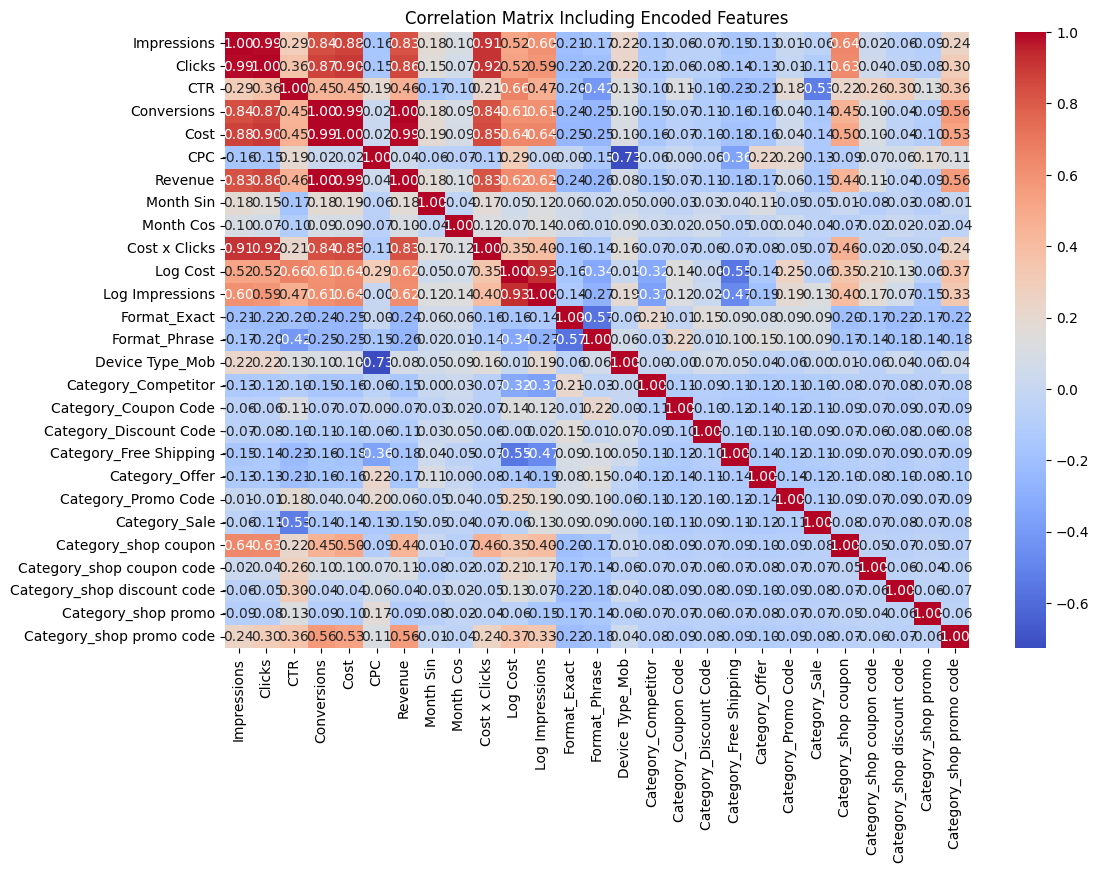

In [ ]:
# Calculate correlation matrix including encoded features
correlation_matrix = df_train_model.corr()

# Set a threshold for high correlation (e.g., > 0.9)
high_correlation = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1.0)]

# Display the correlation matrix with annotations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Encoded Features')
plt.show()

In [ ]:
df_train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 29 to 102
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Impressions                  121 non-null    float64
 1   Clicks                       121 non-null    float64
 2   CTR                          121 non-null    float64
 3   Conversions                  121 non-null    int64  
 4   Cost                         121 non-null    float64
 5   CPC                          121 non-null    float64
 6   Revenue                      121 non-null    int64  
 7   Month Sin                    121 non-null    float64
 8   Month Cos                    121 non-null    float64
 9   Cost x Clicks                121 non-null    float64
 10  Log Cost                     121 non-null    float64
 11  Log Impressions              121 non-null    float64
 12  Format_Exact                 121 non-null    bool   
 13  Format_Phrase           

## Creating a CSV File of the Normalized Feature Set
Saving our progress so far into a CSV file so when the Google Colab Runtime ends we can pick-up from here.

**Note**: Make Sure to dowload the CSV file to your local machine since when the colab runnite ends the files will be removed.

In [ ]:
# Save the normalized dataset to a CSV file
df_train_model.to_csv('normalized_train_model.csv', index=False)
print("Normalized training dataset saved as 'normalized_train_model.csv'.")

Normalized training dataset saved as 'normalized_train_model.csv'.


## Applying same Feature Engineering, Normalization and One-Hote Encoding to the Test data set

To ensure the test set is processed exactly the same way as the training set, we applied feature engineering, normalization, and encoding. This prevents data leakage and ensures the model evaluates new data correctly.

In [ ]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 68 to 85
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad Group                  31 non-null     object 
 1   Month                     31 non-null     object 
 2   Impressions               31 non-null     int64  
 3   Clicks                    31 non-null     int64  
 4   CTR                       31 non-null     float64
 5   Conversions               31 non-null     int64  
 6   Cost                      31 non-null     int64  
 7   CPC                       31 non-null     float64
 8   Revenue                   31 non-null     int64  
 9   Sale Amount               31 non-null     float64
 10  P&L                       31 non-null     float64
 11  Calculated Conv Rate (%)  31 non-null     float64
 12  Shop Type                 31 non-null     object 
 13  Format                    31 non-null     object 
 14  Device Type     

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. **Feature Engineering** on `df_test_model`
# Map months to numeric values
month_mapping = {'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11}
df_test_model['Month Numeric'] = df_test_model['Month'].map(month_mapping)

# Cyclical encoding for the Month column
df_test_model['Month Sin'] = np.sin(2 * np.pi * df_test_model['Month Numeric'] / 12)
df_test_model['Month Cos'] = np.cos(2 * np.pi * df_test_model['Month Numeric'] / 12)

# Drop the original Month column
df_test_model.drop(columns=['Month'], inplace=True)

# Create Click Efficiency feature
df_test_model['Clicks per Impression'] = df_test_model['Clicks'] / df_test_model['Impressions']

# Interaction terms
df_test_model['Cost x Impressions'] = df_test_model['Cost'] * df_test_model['Impressions']
df_test_model['Cost x Clicks'] = df_test_model['Cost'] * df_test_model['Clicks']

# Log transformations
df_test_model['Log Cost'] = np.log1p(df_test_model['Cost'])
df_test_model['Log Impressions'] = np.log1p(df_test_model['Impressions'])

# Device-specific interaction features
if 'Device Type_Mob' in df_test_model.columns:
    df_test_model['Cost x Mobile'] = df_test_model['Cost'] * df_test_model['Device Type_Mob']
    df_test_model['Impressions x Mobile'] = df_test_model['Impressions'] * df_test_model['Device Type_Mob']

# Handle potential division by zero
df_test_model.replace([float('inf'), float('-inf')], 0, inplace=True)

# 2. **Drop Correlated Features**
# Drop "Clicks per Impression"
df_test_model.drop(columns=['Clicks per Impression'], inplace=True)

# Drop "Month Numeric" (keeping "Month Cos")
df_test_model.drop(columns=['Month Numeric'], inplace=True)

# Drop "Cost x Impressions"
df_test_model.drop(columns=['Cost x Impressions'], inplace=True)

# 4. **Normalize Numerical Columns**
# List of numerical columns to normalize
numeric_columns = [
    'Impressions', 'Clicks', 'CTR', 'Cost', 'CPC',
    'Month Sin', 'Month Cos', 'Cost x Clicks',
    'Log Cost', 'Log Impressions'
]

# Apply the Min-Max Scaler (fitted on training data) to the test set
df_test_model[numeric_columns] = scaler.transform(df_test_model[numeric_columns])

# 5. **One-Hot Encoding for Categorical Columns**
# Perform One-Hot Encoding for categorical columns
categorical_columns = ['Shop Type', 'Format', 'Device Type', 'Category']

# Use pd.get_dummies for one-hot encoding
df_test_model = pd.get_dummies(df_test_model, columns=categorical_columns, drop_first=True)

# 6. **Verify the Test Dataset**
df_test_model.info()
df_test_model.head()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 68 to 85
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad Group                     31 non-null     object 
 1   Impressions                  31 non-null     float64
 2   Clicks                       31 non-null     float64
 3   CTR                          31 non-null     float64
 4   Conversions                  31 non-null     int64  
 5   Cost                         31 non-null     float64
 6   CPC                          31 non-null     float64
 7   Revenue                      31 non-null     int64  
 8   Sale Amount                  31 non-null     float64
 9   P&L                          31 non-null     float64
 10  Calculated Conv Rate (%)     31 non-null     float64
 11  Month Sin                    31 non-null     float64
 12  Month Cos                    31 non-null     float64
 13  Cost x Clicks             

,Ad Group,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Sale Amount,P&L,...,Category_Discount Code,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code
68,Shop - 1:1 - Desk - [shop coupon code],0.035154,0.039207,0.833333,593,0.113640,0.601064,3973,87840.47,-975.676,...,False,False,False,False,False,False,True,False,False,False
147,Shop - Phrase - Desk - Discount Code,0.002792,0.001216,0.238095,17,0.003055,0.505319,121,2514.88,-12.744,...,True,False,False,False,False,False,False,False,False,False
96,Shop - Phrase - Desk - Coupon Code,0.018967,0.016378,0.619048,226,0.040559,0.500000,1455,33678.17,-312.263,...,False,False,False,False,False,False,False,False,False,False
82,Shop - Phrase - Mob - Competitor,0.000043,0.000111,0.500000,3,0.000115,0.207447,41,822.51,35.132,...,False,False,False,False,False,False,False,False,False,False
135,Shop - Phrase - Desk - Free Shipping,0.000123,0.000070,0.190476,1,0.000092,0.228723,8,157.97,2.900,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Save the normalized dataset to a CSV file
df_test_model.to_csv('normalized_test_model.csv', index=False)
print("Normalized test dataset saved as 'normalized_test_model.csv'.")

Normalized test dataset saved as 'normalized_test_model.csv'.


## Ensuring Feature Alignment Between Training and Test Datasets
**Note:** You may use the normalized train and test dataset CSV files in this section.

* normalized_train_model.csv
* normalized_test_model.csv

In [25]:
import pandas as pd

# Load the train and test datasets
df_train_model = pd.read_csv('normalized_train_model.csv')
df_test_model = pd.read_csv('normalized_test_model.csv')

# Get the columns of both datasets
train_columns = set(df_train_model.columns)
test_columns = set(df_test_model.columns)

# Find differences
missing_in_train = test_columns - train_columns
missing_in_test = train_columns - test_columns

# Display the results
if missing_in_train:
    print("Columns in test set but missing in train set:")
    print(missing_in_train)
else:
    print("No columns in the test set are missing from the train set.")

if missing_in_test:
    print("\nColumns in train set but missing in test set:")
    print(missing_in_test)
else:
    print("\nNo columns in the train set are missing from the test set.")


Columns in test set but missing in train set:
{'Ad Group', 'Sale Amount', 'Calculated Conv Rate (%)', 'P&L'}

Columns in train set but missing in test set:
{'Category_Competitor'}


### Addressing the missing Features

In [26]:
# Columns to drop from the test set that are not required for predictions
columns_to_drop_test = ['Ad Group', 'P&L', 'Sale Amount', 'Calculated Conv Rate (%)']

# Drop unnecessary columns from the test set
df_test_model = df_test_model.drop(columns=columns_to_drop_test, errors='ignore')

# Add 'Category_Competitor' to the test dataset with a default value of False
df_test_model['Category_Competitor'] = False

df_test_model.head()



,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Month Sin,Month Cos,Cost x Clicks,...,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code,Category_Competitor
0,0.035154,0.039207,0.833333,593,0.113640,0.601064,3973,0.000000,0.500000,5.072221e-03,...,False,False,False,False,False,True,False,False,False,False
1,0.002792,0.001216,0.238095,17,0.003055,0.505319,121,0.000000,0.500000,4.326415e-06,...,False,False,False,False,False,False,False,False,False,False
2,0.018967,0.016378,0.619048,226,0.040559,0.500000,1455,0.267949,0.211325,7.570549e-04,...,False,False,False,False,False,False,False,False,False,False
3,0.000043,0.000111,0.500000,3,0.000115,0.207447,41,0.267949,0.211325,1.995191e-08,...,False,False,False,False,False,False,False,False,False,False
4,0.000123,0.000070,0.190476,1,0.000092,0.228723,8,0.267949,0.788675,1.128858e-08,...,True,False,False,False,False,False,False,False,False,False


In [27]:
# Get the columns of both datasets
train_columns = set(df_train_model.columns)
test_columns = set(df_test_model.columns)

# Find differences
missing_in_train = test_columns - train_columns
missing_in_test = train_columns - test_columns

# Display the results
if missing_in_train:
    print("Columns in test set but missing in train set:")
    print(missing_in_train)
else:
    print("No columns in the test set are missing from the train set.")

if missing_in_test:
    print("\nColumns in train set but missing in test set:")
    print(missing_in_test)
else:
    print("\nNo columns in the train set are missing from the test set.")


No columns in the test set are missing from the train set.

No columns in the train set are missing from the test set.


In [28]:
df_test_model.head()

,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Month Sin,Month Cos,Cost x Clicks,...,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code,Category_Competitor
0,0.035154,0.039207,0.833333,593,0.113640,0.601064,3973,0.000000,0.500000,5.072221e-03,...,False,False,False,False,False,True,False,False,False,False
1,0.002792,0.001216,0.238095,17,0.003055,0.505319,121,0.000000,0.500000,4.326415e-06,...,False,False,False,False,False,False,False,False,False,False
2,0.018967,0.016378,0.619048,226,0.040559,0.500000,1455,0.267949,0.211325,7.570549e-04,...,False,False,False,False,False,False,False,False,False,False
3,0.000043,0.000111,0.500000,3,0.000115,0.207447,41,0.267949,0.211325,1.995191e-08,...,False,False,False,False,False,False,False,False,False,False
4,0.000123,0.000070,0.190476,1,0.000092,0.228723,8,0.267949,0.788675,1.128858e-08,...,True,False,False,False,False,False,False,False,False,False


In [29]:
df_train_model.head()

,Impressions,Clicks,CTR,Conversions,Cost,CPC,Revenue,Month Sin,Month Cos,Cost x Clicks,...,Category_Discount Code,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code
0,0.030434,0.007275,0.095238,26,0.006339,0.127660,115,0.267949,0.788675,5.279381e-05,...,False,False,False,False,True,False,False,False,False,False
1,0.114834,0.071912,0.428571,532,0.116534,0.303191,3260,1.000000,1.000000,9.538044e-03,...,False,False,True,False,False,False,False,False,False,False
2,0.034647,0.029199,0.595238,199,0.033876,0.196809,1211,0.267949,0.788675,1.126812e-03,...,False,False,False,True,False,False,False,False,False,False
3,0.024590,0.012389,0.309524,85,0.014699,0.202128,676,1.000000,1.000000,2.078236e-04,...,False,False,True,False,False,False,False,False,False,False
4,0.000061,0.000090,0.357143,2,0.000092,0.196809,16,1.000000,0.000000,1.391383e-08,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Check if the column order matches between train and test datasets
train_columns = df_train_model.columns.tolist()
test_columns = df_test_model.columns.tolist()

if train_columns == test_columns:
    print("The column order matches between the train and test datasets!")
else:
    print("The column order does not match.")

    # Print mismatched columns for debugging
    print("\nTrain dataset columns:")
    print(train_columns)
    print("\nTest dataset columns:")
    print(test_columns)


The column order does not match.

Train dataset columns:
['Impressions', 'Clicks', 'CTR', 'Conversions', 'Cost', 'CPC', 'Revenue', 'Month Sin', 'Month Cos', 'Cost x Clicks', 'Log Cost', 'Log Impressions', 'Format_Exact', 'Format_Phrase', 'Device Type_Mob', 'Category_Competitor', 'Category_Coupon Code', 'Category_Discount Code', 'Category_Free Shipping', 'Category_Offer', 'Category_Promo Code', 'Category_Sale', 'Category_shop coupon', 'Category_shop coupon code', 'Category_shop discount code', 'Category_shop promo', 'Category_shop promo code']

Test dataset columns:
['Impressions', 'Clicks', 'CTR', 'Conversions', 'Cost', 'CPC', 'Revenue', 'Month Sin', 'Month Cos', 'Cost x Clicks', 'Log Cost', 'Log Impressions', 'Format_Exact', 'Format_Phrase', 'Device Type_Mob', 'Category_Coupon Code', 'Category_Discount Code', 'Category_Free Shipping', 'Category_Offer', 'Category_Promo Code', 'Category_Sale', 'Category_shop coupon', 'Category_shop coupon code', 'Category_shop discount code', 'Category_

In [31]:
# Reorder test dataset columns to match train dataset
df_test_model = df_test_model[df_train_model.columns]

# Verify that the columns now match
if df_test_model.columns.tolist() == df_train_model.columns.tolist():
    print("The test dataset columns have been successfully reordered to match the train dataset!")
else:
    print("There is still a mismatch in the column order.")

The test dataset columns have been successfully reordered to match the train dataset!


## Saving Final Normalized CSV Files

In [32]:
# Save the normalized dataset to a CSV file
df_test_model.to_csv('normalized_train_model_final.csv', index=False)
print("Normalized train dataset saved as 'normalized_train_model_final.csv'.")

df_test_model.to_csv('normalized_test_model_final.csv', index=False)
print("Normalized test dataset saved as 'normalized_test_model_final.csv'.")

Normalized train dataset saved as 'normalized_train_model_final.csv'.
Normalized test dataset saved as 'normalized_test_model_final.csv'.


# 💻 Model Training and Evaluation

**Ensure that you use the provided CSV files from GitHub.**
While the files can be generated using the code above, they have been pre-generated for convenience. Please ensure that the following files are uploaded to your Colab environment:

*   normalized_train_model_final.csv
*   normalized_test_model_final.csv





## Linear Regression Model Training
This section covers training, testing, validating, and refining the predictive models.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the train and test datasets
df_train_model = pd.read_csv('normalized_train_model_final.csv')
df_test_model = pd.read_csv('normalized_test_model_final.csv')

# Define features and targets
X_train = df_train_model.drop(columns=['Revenue', 'Conversions'])
y_train_revenue = df_train_model['Revenue']
y_train_conversions = df_train_model['Conversions']

X_test = df_test_model.drop(columns=['Revenue', 'Conversions'])
y_test_revenue = df_test_model['Revenue']
y_test_conversions = df_test_model['Conversions']

# Train Linear Regression for Revenue
lr_revenue = LinearRegression()
lr_revenue.fit(X_train, y_train_revenue)
y_pred_revenue = lr_revenue.predict(X_test)

print("Linear Regression Performance for Revenue:")
print("MAE:", mean_absolute_error(y_test_revenue, y_pred_revenue))
print("MSE:", mean_squared_error(y_test_revenue, y_pred_revenue))
print("R²:", r2_score(y_test_revenue, y_pred_revenue))

# Train Linear Regression for Conversions
lr_conversions = LinearRegression()
lr_conversions.fit(X_train, y_train_conversions)
y_pred_conversions = lr_conversions.predict(X_test)

print("\nLinear Regression Performance for Conversions:")
print("MAE:", mean_absolute_error(y_test_conversions, y_pred_conversions))
print("MSE:", mean_squared_error(y_test_conversions, y_pred_conversions))
print("R²:", r2_score(y_test_conversions, y_pred_conversions))

Linear Regression Performance for Revenue:
MAE: 90.9635021385214
MSE: 19994.545822470598
R²: 0.9996419641460743

Linear Regression Performance for Conversions:
MAE: 15.920609185988738
MSE: 599.3086058233166
R²: 0.9996261233180951


### Analyzing Prediction Errors by Impression Volume
This visualization helps analyze the relationship between impression volume and prediction errors for revenue and conversions. By plotting absolute errors against impressions, we can identify potential patterns, such as whether lower impression counts contribute to higher prediction inaccuracies.

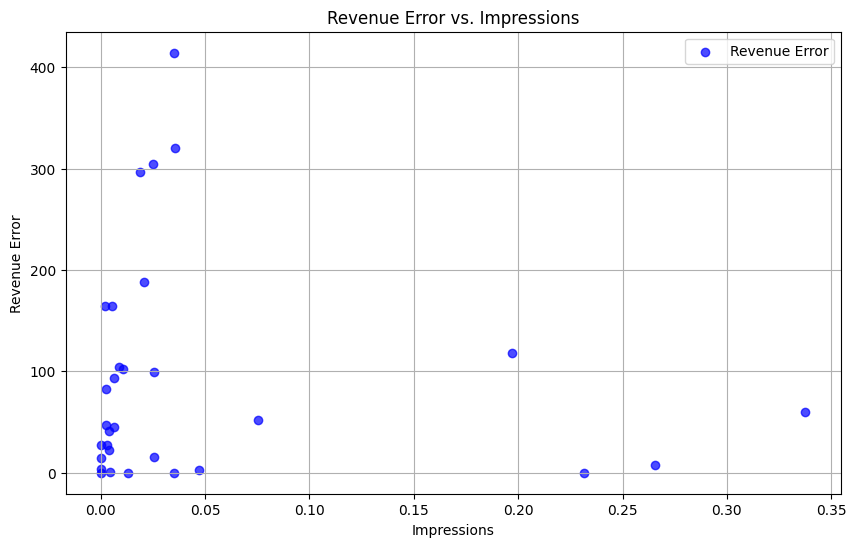

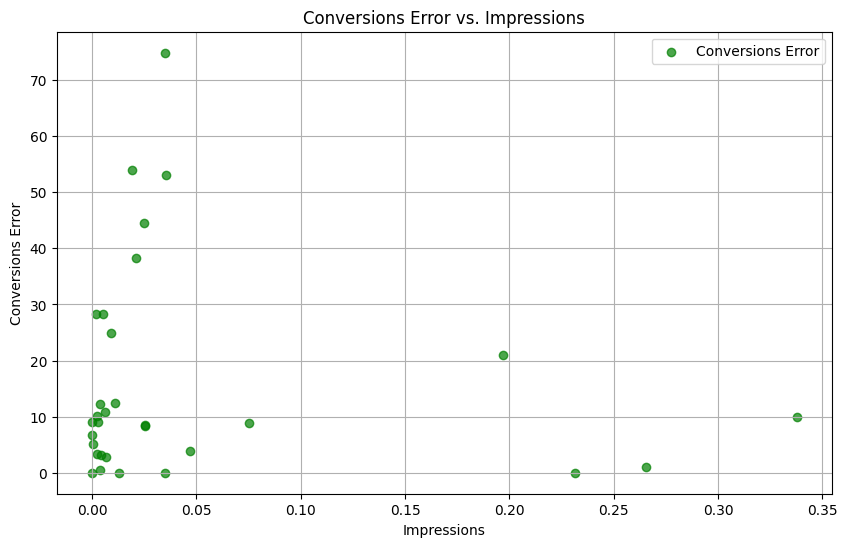

In [34]:
import matplotlib.pyplot as plt

# Calculate absolute errors for revenue and conversions
df_test_model['Revenue Error'] = abs(y_test_revenue - y_pred_revenue)
df_test_model['Conversions Error'] = abs(y_test_conversions - y_pred_conversions)

# Plot Revenue Error vs. Impressions
plt.figure(figsize=(10, 6))
plt.scatter(df_test_model['Impressions'], df_test_model['Revenue Error'], alpha=0.7, color='blue', label='Revenue Error')
plt.xlabel('Impressions')
plt.ylabel('Revenue Error')
plt.title('Revenue Error vs. Impressions')
plt.grid(True)
plt.legend()
plt.show()

# Plot Conversions Error vs. Impressions
plt.figure(figsize=(10, 6))
plt.scatter(df_test_model['Impressions'], df_test_model['Conversions Error'], alpha=0.7, color='green', label='Conversions Error')
plt.xlabel('Impressions')
plt.ylabel('Conversions Error')
plt.title('Conversions Error vs. Impressions')
plt.grid(True)
plt.legend()
plt.show()


### Visualizing Prediction Accuracy for Conversions and Revenue

This table provides a clear comparison between actual and predicted values for conversions and revenue, allowing us to assess the model's accuracy on an individual basis.

* Green: Predictions within 10% error (high accuracy).
* Yellow: Predictions within 10-20% error (moderate accuracy).
* Red: Predictions with over 20% error (low accuracy, potential outliers).

In [35]:
import pandas as pd
import numpy as np

# Use the predicted and actual values from your linear regression model
results = pd.DataFrame({
    'Actual Conversions': y_test_conversions,
    'Predicted Conversions': y_pred_conversions,
    'Actual Revenue': y_test_revenue,
    'Predicted Revenue': y_pred_revenue,
})

# Calculate the percentage error for Conversions and Revenue
results['Error % Conversions'] = np.abs(results['Actual Conversions'] - results['Predicted Conversions']) / results['Actual Conversions'] * 100
results['Error % Revenue'] = np.abs(results['Actual Revenue'] - results['Predicted Revenue']) / results['Actual Revenue'] * 100

# Round the values for cleaner display
results = results.round({'Predicted Conversions': 2, 'Predicted Revenue': 2, 'Error % Conversions': 2, 'Error % Revenue': 2})

# Define color formatting function
def highlight_error(val):
    if val <= 10:
        return 'background-color: lightgreen;'
    elif val <= 20:
        return 'background-color: yellow;'
    else:
        return 'background-color: lightcoral;'

# Apply formatting to error columns
styled_results = results.style.applymap(highlight_error, subset=['Error % Conversions', 'Error % Revenue'])

# Display styled DataFrame
from IPython.display import display
display(styled_results)



<ipython-input-35-aecf65bce67d>:29: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_error, subset=['Error % Conversions', 'Error % Revenue'])


,Actual Conversions,Predicted Conversions,Actual Revenue,Predicted Revenue,Error % Conversions,Error % Revenue
0,593,593.000000,3973,3973.000000,0.000000,0.000000
1,17,7.890000,121,147.890000,53.560000,22.220000
2,226,279.960000,1455,1751.770000,23.870000,20.400000
3,3,3.000000,41,41.000000,0.000000,0.000000
4,1,-8.000000,8,-6.810000,900.260000,185.190000
5,38,41.090000,207,207.510000,8.130000,0.250000
6,248,248.000000,1723,1723.000000,0.000000,0.000000
7,5782,5782.000000,34518,34518.000000,0.000000,0.000000
8,55,83.360000,303,467.160000,51.570000,54.180000
9,55,65.800000,95,188.560000,19.630000,98.480000


## Training Linear Regression Model - Part 2

To improve the realism and reliability of the model, the following adjustments were implemented:

* **Negative Prediction Correction**: Since revenue and conversions cannot be negative in real-world scenarios, a correction step was added to ensure that all predicted values remain non-negative.
* **Logical Consistency**: If conversions are predicted as zero, revenue is also set to zero (and vice versa). This maintains a natural dependency between the two, preventing unrealistic outcomes such as revenue without conversions.
* **Integer Conversions**: Since conversions represent discrete events, all predicted conversion values are rounded to whole numbers to align with real-world behavior.
These adjustments enhance the model’s interpretability and ensure more reliable predictions for practical use cases.







In [2]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the train and test datasets
df_train_model = pd.read_csv('normalized_train_model_final.csv')
df_test_model = pd.read_csv('normalized_test_model_final.csv')

# Define features and targets for train and test sets
X_train = df_train_model.drop(columns=['Revenue', 'Conversions'])
y_train = df_train_model[['Revenue', 'Conversions']]

X_test = df_test_model.drop(columns=['Revenue', 'Conversions'])
y_test = df_test_model[['Revenue', 'Conversions']]

# Initialize the MultiOutput Regressor with Linear Regression
multi_output_model = MultiOutputRegressor(LinearRegression())

# Train the joint model
multi_output_model.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_output_model.predict(X_test)

# Extract predicted revenue and conversions
y_pred_revenue = y_pred[:, 0]
y_pred_conversions = y_pred[:, 1]

# Correct negative predictions
y_pred_revenue_corrected = np.maximum(y_pred_revenue, 0)
y_pred_conversions_corrected = np.round(np.maximum(y_pred_conversions, 0)) #Rounding numbers since we cannot have decimal conv

# Enforce dependency between Revenue and Conversions
y_pred_revenue_corrected = np.where(y_pred_conversions_corrected == 0, 0, y_pred_revenue_corrected)
y_pred_conversions_corrected = np.where(y_pred_revenue_corrected == 0, 0, y_pred_conversions_corrected)

# Evaluate Revenue Performance
print("Joint Model Performance for Revenue:")
print("MAE:", mean_absolute_error(y_test['Revenue'], y_pred_revenue_corrected))
print("MSE:", mean_squared_error(y_test['Revenue'], y_pred_revenue_corrected))
print("R²:", r2_score(y_test['Revenue'], y_pred_revenue_corrected))

# Evaluate Conversions Performance
print("\nJoint Model Performance for Conversions:")
print("MAE:", mean_absolute_error(y_test['Conversions'], y_pred_conversions_corrected))
print("MSE:", mean_squared_error(y_test['Conversions'], y_pred_conversions_corrected))
print("R²:", r2_score(y_test['Conversions'], y_pred_conversions_corrected))


Joint Model Performance for Revenue:
MAE: 90.94330736498374
MSE: 20411.45364031858
R²: 0.9996344987128559

Joint Model Performance for Conversions:
MAE: 15.0
MSE: 582.9354838709677
R²: 0.9996363376358081


### Visualizing Prediction Accuracy for Conversions and Revenue

This table provides a clear comparison between actual and predicted values for conversions and revenue, allowing us to assess the model's accuracy on an individual basis.

* Green: Predictions within 10% error (high accuracy).
* Yellow: Predictions within 10-20% error (moderate accuracy).
* Red: Predictions with over 20% error (low accuracy, potential outliers).

In [4]:
import pandas as pd
import numpy as np

#Setting the variables
y_test_conversions = df_test_model['Conversions']
y_test_revenue = df_test_model['Revenue']

# Use the predicted and actual values from your linear regression model
results = pd.DataFrame({
    'Actual Conversions': y_test_conversions,
    'Predicted Conversions': y_pred_conversions_corrected,  # Using corrected values
    'Actual Revenue': y_test_revenue,
    'Predicted Revenue': y_pred_revenue_corrected,  # Using corrected values
})

# Calculate percentage error safely
def safe_percentage_error(actual, predicted):
    if actual == 0 and predicted == 0:
        return 0  # Perfect match, no error
    elif actual == 0 and predicted > 0:
        return 100  # Full error, unexpected prediction
    elif actual > 0 and predicted == 0:
        return 100  # Full error, missing prediction
    else:
        return abs((actual - predicted) / actual) * 100  # Normal case

# Apply function to each row
results['Error % Conversions'] = results.apply(lambda row: safe_percentage_error(row['Actual Conversions'], row['Predicted Conversions']), axis=1)
results['Error % Revenue'] = results.apply(lambda row: safe_percentage_error(row['Actual Revenue'], row['Predicted Revenue']), axis=1)

# Round values for cleaner display
results = results.round({'Predicted Conversions': 2, 'Predicted Revenue': 2, 'Error % Conversions': 2, 'Error % Revenue': 2})

# Define color formatting function
def highlight_error(val):
    if val <= 10:
        return 'background-color: lightgreen;'
    elif val <= 20:
        return 'background-color: yellow;'
    else:
        return 'background-color: lightcoral;'

# Apply formatting to error columns
styled_results = results.style.applymap(highlight_error, subset=['Error % Conversions', 'Error % Revenue'])

# Display styled DataFrame
from IPython.display import display
display(styled_results)


<ipython-input-4-26ade1d1d610>:44: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_results = results.style.applymap(highlight_error, subset=['Error % Conversions', 'Error % Revenue'])


,Actual Conversions,Predicted Conversions,Actual Revenue,Predicted Revenue,Error % Conversions,Error % Revenue
0,593,593.000000,3973,3973.000000,0.000000,0.000000
1,17,8.000000,121,147.890000,52.940000,22.220000
2,226,280.000000,1455,1751.770000,23.890000,20.400000
3,3,3.000000,41,41.000000,0.000000,0.000000
4,1,0.000000,8,0.000000,100.000000,100.000000
5,38,41.000000,207,207.510000,7.890000,0.250000
6,248,248.000000,1723,1723.000000,0.000000,0.000000
7,5782,5782.000000,34518,34518.000000,0.000000,0.000000
8,55,83.000000,303,467.160000,50.910000,54.180000
9,55,66.000000,95,188.560000,20.000000,98.480000


## Saving our Linear Regression Model

In [42]:
import joblib

# Save the trained model
joblib.dump(multi_output_model, 'joint_revenue_conversions_linear_regression_model.pkl')

print("Model saved as 'joint_revenue_conversions_linear_regression_model.pkl'.")



Model saved as 'joint_revenue_conversions_linear_regression_model.pkl'.


# ✅ Running the Model on the Simulation Dataset

This is the key step where we apply the trained model to a real-world scenario using simulated data.

**Required Files:**
To ensure proper execution, make sure the following files are available:

* minmax_scaler.pkl – Pre-fitted scaler used for consistent data normalization.
* simulation_data.csv – Raw simulation dataset to be processed.
* normalized_train_model_final.csv – Reference dataset for feature alignment.
* joint_revenue_conversions_linear_regression_model.pkl – Trained model for predicting revenue and conversions.

In [65]:
import joblib

# Load the saved scaler
scaler = joblib.load("minmax_scaler.pkl")

## Applying Feature Engineering, Normalization, and One-Hot Encoding to the Simulation Dataset

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the simulation dataset
df_simulation = pd.read_csv('simulation_data.csv')

# 1. **Feature Engineering** on `df_simulation`
# Map months to numeric values
month_mapping = {'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11}
df_simulation['Month Numeric'] = df_simulation['Month'].map(month_mapping)

# Cyclical encoding for the Month column
df_simulation['Month Sin'] = np.sin(2 * np.pi * df_simulation['Month Numeric'] / 12)
df_simulation['Month Cos'] = np.cos(2 * np.pi * df_simulation['Month Numeric'] / 12)

# Drop the original Month column
df_simulation.drop(columns=['Month'], inplace=True)

# Create Click Efficiency feature
df_simulation['Clicks per Impression'] = df_simulation['Clicks'] / df_simulation['Impressions']

# Interaction terms
df_simulation['Cost x Impressions'] = df_simulation['Cost'] * df_simulation['Impressions']
df_simulation['Cost x Clicks'] = df_simulation['Cost'] * df_simulation['Clicks']

# Log transformations
df_simulation['Log Cost'] = np.log1p(df_simulation['Cost'])
df_simulation['Log Impressions'] = np.log1p(df_simulation['Impressions'])

# Device-specific interaction features
if 'Device Type_Mob' in df_simulation.columns:
    df_simulation['Cost x Mobile'] = df_simulation['Cost'] * df_simulation['Device Type_Mob']
    df_simulation['Impressions x Mobile'] = df_simulation['Impressions'] * df_simulation['Device Type_Mob']

# Handle potential division by zero
df_simulation.replace([float('inf'), float('-inf')], 0, inplace=True)

# 2. **Drop Correlated Features**
# Drop "Clicks per Impression"
df_simulation.drop(columns=['Clicks per Impression'], inplace=True)

# Drop "Month Numeric" (keeping "Month Cos")
df_simulation.drop(columns=['Month Numeric'], inplace=True)

# Drop "Cost x Impressions"
df_simulation.drop(columns=['Cost x Impressions'], inplace=True)

# 3. **Normalize Numerical Columns**
# List of numerical columns to normalize
numeric_columns = [
    'Impressions', 'Clicks', 'CTR', 'Cost', 'CPC',
    'Month Sin', 'Month Cos', 'Cost x Clicks',
    'Log Cost', 'Log Impressions'
]

# Apply the Min-Max Scaler (fitted on training data) to the simulation set
df_simulation[numeric_columns] = scaler.transform(df_simulation[numeric_columns])

# 4. **One-Hot Encoding for Categorical Columns**
# Perform One-Hot Encoding for categorical columns
categorical_columns = ['Shop Type', 'Format', 'Device Type', 'Category']

# Use pd.get_dummies for one-hot encoding
df_simulation = pd.get_dummies(df_simulation, columns=categorical_columns, drop_first=True)

# 5. **Verify the Simulation Dataset**
df_simulation.info()
df_simulation.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ad Group                     38 non-null     object 
 1   Impressions                  38 non-null     float64
 2   Clicks                       38 non-null     float64
 3   CTR                          38 non-null     float64
 4   Cost                         38 non-null     float64
 5   CPC                          38 non-null     float64
 6   Month Sin                    38 non-null     float64
 7   Month Cos                    38 non-null     float64
 8   Cost x Clicks                38 non-null     float64
 9   Log Cost                     38 non-null     float64
 10  Log Impressions              38 non-null     float64
 11  Format_Exact                 38 non-null     bool   
 12  Format_Phrase                38 non-null     bool   
 13  Device Type_Mob       

,Ad Group,Impressions,Clicks,CTR,Cost,CPC,Month Sin,Month Cos,Cost x Clicks,Log Cost,...,Category_Coupon Code,Category_Discount Code,Category_Free Shipping,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code
0,Shop - 1:1 - Mob - [shop coupon code],0.358804,0.424832,0.904762,0.554604,0.228723,1.000000,1.000000,2.680624e-01,0.940985,...,False,False,False,False,False,False,True,False,False,False
1,Shop - Phrase - Mob - Competitor,0.000322,0.000301,0.476190,0.000390,0.239362,1.000000,1.000000,1.506894e-07,0.225392,...,False,False,False,False,False,False,False,False,False,False
2,Shop - Phrase - Mob - Competitor,0.000058,0.000070,0.285714,0.000069,0.164894,0.000000,0.500000,8.925856e-09,0.091736,...,False,False,False,False,False,False,False,False,False,False
3,Shop - Phrase - Desk - Discount Code,0.003797,0.001578,0.238095,0.003721,0.473404,0.267949,0.211325,6.803340e-06,0.441186,...,False,True,False,False,False,False,False,False,False,False
4,Shop - Exact - Mob - Offer,0.004520,0.003396,0.500000,0.005466,0.297872,0.000000,0.500000,2.133227e-05,0.479307,...,False,False,False,True,False,False,False,False,False,False


## Ensuring Consistency
Aligning the simulation dataset features with the training dataset for compatibility.





In [67]:
import pandas as pd

# Load the train and simulation datasets
df_train_model = pd.read_csv('normalized_train_model_final.csv')

# Get the columns of both datasets
train_columns = set(df_train_model.columns)
simulation_columns = set(df_simulation.columns)

# Find differences
missing_in_train = simulation_columns - train_columns
missing_in_simulation = train_columns - simulation_columns

# Display the results
if missing_in_train:
    print("Columns in simulation set but missing in train set:")
    print(missing_in_train)
else:
    print("No columns in the simulation set are missing from the train set.")

if missing_in_simulation:
    print("\nColumns in train set but missing in simulation set:")
    print(missing_in_simulation)
else:
    print("\nNo columns in the train set are missing from the simulation set.")


Columns in simulation set but missing in train set:
{'Ad Group'}

Columns in train set but missing in simulation set:
{'Revenue', 'Category_Competitor', 'Category_shop coupon', 'Conversions'}


In [68]:
# Drop 'Ad Group' from simulation set
df_simulation.drop(columns=['Ad Group'], inplace=True, errors='ignore')

# Ensure all missing categorical features from train set exist in simulation set
missing_categories = ['Category_Competitor', 'Category_shop coupon']

for col in missing_categories:
    df_simulation[col] = False  # Assign False since they didn't appear in the simulation data

In [69]:
import pandas as pd

# Get the columns of both datasets
train_columns = set(df_train_model.columns)
simulation_columns = set(df_simulation.columns)

# Find differences
missing_in_train = simulation_columns - train_columns
missing_in_simulation = train_columns - simulation_columns

# Display the results
if missing_in_train:
    print("Columns in simulation set but missing in train set:")
    print(missing_in_train)
else:
    print("No columns in the simulation set are missing from the train set.")

if missing_in_simulation:
    print("\nColumns in train set but missing in simulation set:")
    print(missing_in_simulation)
else:
    print("\nNo columns in the train set are missing from the simulation set.")

No columns in the simulation set are missing from the train set.

Columns in train set but missing in simulation set:
{'Revenue', 'Conversions'}


In [70]:
# Check if the column order matches
train_columns = df_train_model.columns.tolist()
simulation_columns = df_simulation.columns.tolist()

if train_columns == simulation_columns:
    print("The column order matches between the train and simulation datasets!")
else:
    print("The column order does not match.")

    # Print mismatched columns for debugging
    print("\nTrain dataset columns:")
    print(train_columns)
    print("\nSimulation dataset columns:")
    print(simulation_columns)

The column order does not match.

Train dataset columns:
['Impressions', 'Clicks', 'CTR', 'Conversions', 'Cost', 'CPC', 'Revenue', 'Month Sin', 'Month Cos', 'Cost x Clicks', 'Log Cost', 'Log Impressions', 'Format_Exact', 'Format_Phrase', 'Device Type_Mob', 'Category_Competitor', 'Category_Coupon Code', 'Category_Discount Code', 'Category_Free Shipping', 'Category_Offer', 'Category_Promo Code', 'Category_Sale', 'Category_shop coupon', 'Category_shop coupon code', 'Category_shop discount code', 'Category_shop promo', 'Category_shop promo code']

Simulation dataset columns:
['Impressions', 'Clicks', 'CTR', 'Cost', 'CPC', 'Month Sin', 'Month Cos', 'Cost x Clicks', 'Log Cost', 'Log Impressions', 'Format_Exact', 'Format_Phrase', 'Device Type_Mob', 'Category_Coupon Code', 'Category_Discount Code', 'Category_Free Shipping', 'Category_Offer', 'Category_Promo Code', 'Category_Sale', 'Category_shop coupon code', 'Category_shop discount code', 'Category_shop promo', 'Category_shop promo code', 'Ca

In [71]:
# Get only feature columns (exclude 'Conversions' and 'Revenue' from train set)
feature_columns = [col for col in df_train_model.columns if col not in ['Conversions', 'Revenue']]

# Reorder simulation dataset columns to match the train dataset features
df_simulation = df_simulation[feature_columns]

# Verify that the columns now match (features only)
if df_simulation.columns.tolist() == feature_columns:
    print("The simulation dataset columns have been successfully reordered to match the train dataset features!")
else:
    print("There is still a mismatch in the column order.")



The simulation dataset columns have been successfully reordered to match the train dataset features!


## Running the Simulation Data Through the Model

In [75]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model_filename = "joint_revenue_conversions_linear_regression_model.pkl"
model = joblib.load(model_filename)

# Make predictions using the simulation dataset
y_pred_simulation = model.predict(df_simulation)

# Extract predictions for revenue and conversions
y_pred_simulation_revenue = y_pred_simulation[:, 0]
y_pred_simulation_conversions = y_pred_simulation[:, 1]

# Apply corrections:
# Ensure no negative values
y_pred_simulation_revenue_corrected = np.maximum(y_pred_simulation_revenue, 0)
y_pred_simulation_conversions_corrected = np.maximum(y_pred_simulation_conversions, 0)

# Enforce dependency: If conversions are 0, revenue must also be 0
y_pred_simulation_revenue_corrected = np.where(y_pred_simulation_conversions_corrected == 0, 0, y_pred_simulation_revenue_corrected)
y_pred_simulation_conversions_corrected = np.where(y_pred_simulation_revenue_corrected == 0, 0, y_pred_simulation_conversions_corrected)

# Round conversions to whole numbers (since partial conversions don't exist)
y_pred_simulation_conversions_corrected = np.round(y_pred_simulation_conversions_corrected)

# Store predictions in a DataFrame
df_simulation_results = df_simulation.copy()
df_simulation_results["Predicted Conversions"] = y_pred_simulation_conversions_corrected
df_simulation_results["Predicted Revenue"] = y_pred_simulation_revenue_corrected

df_simulation_results.head(10)


,Impressions,Clicks,CTR,Cost,CPC,Month Sin,Month Cos,Cost x Clicks,Log Cost,Log Impressions,...,Category_Offer,Category_Promo Code,Category_Sale,Category_shop coupon,Category_shop coupon code,Category_shop discount code,Category_shop promo,Category_shop promo code,Predicted Conversions,Predicted Revenue
0,0.358804,0.424832,0.904762,0.554604,0.228723,1.000000,1.000000,2.680624e-01,0.940985,0.884429,...,False,False,False,False,True,False,False,False,4767.0,27183.500947
1,0.000322,0.000301,0.476190,0.000390,0.239362,1.000000,1.000000,1.506894e-07,0.225392,0.134038,...,False,False,False,False,False,False,False,False,50.0,236.425468
2,0.000058,0.000070,0.285714,0.000069,0.164894,0.000000,0.500000,8.925856e-09,0.091736,0.038771,...,False,False,False,False,False,False,False,False,0.0,0.000000
3,0.003797,0.001578,0.238095,0.003721,0.473404,0.267949,0.211325,6.803340e-06,0.441186,0.375503,...,False,False,False,False,False,False,False,False,14.0,139.764668
4,0.004520,0.003396,0.500000,0.005466,0.297872,0.000000,0.500000,2.133227e-05,0.479307,0.394519,...,True,False,False,False,False,False,False,False,0.0,0.000000
5,0.026500,0.027039,0.761905,0.079649,0.611702,1.000000,0.000000,2.452514e-03,0.746746,0.591114,...,False,True,False,False,False,False,False,False,387.0,2596.045195
6,0.006643,0.007074,0.785714,0.011116,0.292553,1.000000,0.000000,8.989072e-05,0.549946,0.436843,...,False,False,False,False,False,False,True,False,84.0,371.187954
7,0.022710,0.005989,0.095238,0.009531,0.297872,1.000000,0.000000,6.530734e-05,0.534616,0.573808,...,False,False,True,False,False,False,False,False,0.0,0.000000
8,0.017560,0.005516,0.142857,0.005168,0.143617,0.267949,0.788675,3.269068e-05,0.473732,0.545009,...,False,False,True,False,False,False,False,False,15.0,140.045316
9,0.018103,0.015604,0.619048,0.039802,0.521277,0.267949,0.788675,7.078645e-04,0.677350,0.548413,...,False,False,False,False,False,False,False,False,240.0,1570.986291


In [77]:
# Load the simulation dataset
df_simulation = pd.read_csv('simulation_data.csv')

# Select only the necessary columns from the predictions dataset
predictions = df_simulation_results[['Predicted Conversions', 'Predicted Revenue']]

# Reset index to ensure proper merging
df_simulation = df_simulation.reset_index(drop=True)
predictions = predictions.reset_index(drop=True)

# Merge the predictions with the original dataset
df_simulation_final = pd.concat([df_simulation, predictions], axis=1)

df_simulation_final.head(50)

,Ad Group,Month,Impressions,Clicks,CTR,Cost,CPC,Shop Type,Format,Device Type,Category,Predicted Conversions,Predicted Revenue
0,Shop - 1:1 - Mob - [shop coupon code],November,99258,42283,0.43,24149,0.57,Shop,1:1,Mob,shop coupon code,4767.0,27183.500947
1,Shop - Phrase - Mob - Competitor,November,127,32,0.25,18,0.59,Shop,Phrase,Mob,Competitor,50.0,236.425468
2,Shop - Phrase - Mob - Competitor,September,54,9,0.17,4,0.45,Shop,Phrase,Mob,Competitor,0.0,0.000000
3,Shop - Phrase - Desk - Discount Code,August,1088,159,0.15,163,1.03,Shop,Phrase,Desk,Discount Code,14.0,139.764668
4,Shop - Exact - Mob - Offer,September,1288,340,0.26,239,0.70,Shop,Exact,Mob,Offer,0.0,0.000000
5,Shop - Exact - Desk - Promo Code,July,7366,2693,0.37,3469,1.29,Shop,Exact,Desk,Promo Code,387.0,2596.045195
6,Shop - 1:1 - Mob - [shop promo],July,1875,706,0.38,485,0.69,Shop,1:1,Mob,shop promo,84.0,371.187954
7,Shop - Exact - Desk - Sale,July,6318,598,0.09,416,0.70,Shop,Exact,Desk,Sale,0.0,0.000000
8,Shop - Phrase - Mob - Sale,October,4894,551,0.11,226,0.41,Shop,Phrase,Mob,Sale,15.0,140.045316
9,Shop - Exact - Desk - Coupon Code,October,5044,1555,0.31,1734,1.12,Shop,Exact,Desk,Coupon Code,240.0,1570.986291
